In [1]:
import pickle
with open('abc-test-results.pkl', 'rb') as f:
    AB_statistics = pickle.load(f)
AB_statistics.head(3)

,short,question,medium,long,fetched,fetched_time,choice,answer_short,answer_medium,answer_long
43,67 5.1.3 Basic rules of probability 69 5.1.4...,"How are random numbers generated, and what is ...",67 5.1.3 Basic rules of probability 69 5.1.4...,67 5.1.3 Basic rules of probability 69 5.1.4...,True,1686494949,short,Random numbers are generated using various alg...,Random numbers are generated using various alg...,Random numbers are generated using algorithms ...
68,282 17 Ensemble methods 285 17.1 Introductio...,What are the practical issues with the K-means...,243 14.1 Least squares regularization 243 14....,243 14.1 Least squares regularization 243 14....,True,1686499593,medium,The practical issues with the K-means algorith...,The K-means algorithm is a popular clustering ...,The practical issues with the K-means algorith...
100,"We might still think these tasks, impressive ...",Who is Susi and what is her profession?,"We might still think these tasks, impressive ...","We might still think these tasks, impressive ...",True,1686484446,long,Susi is an electrical engineer who is in charg...,Susi is an electrical engineer who is in charg...,Susi is an electrical engineer who is in charg...


In [2]:
choices = AB_statistics['choice'].value_counts()
long, medium, short = choices / 100
results = [short, medium, long]

In [3]:
results

[0.29, 0.31, 0.4]

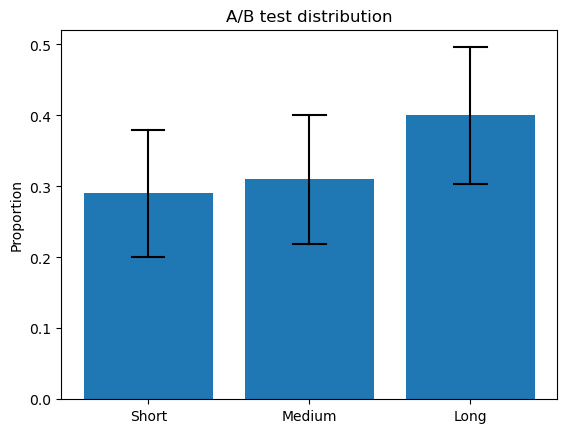

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def errorbar(data):
    CI = [1.96 * np.sqrt(x * (1-x) / 100) for x in data]
    width = 0.1
    for i in range(len(data)):
        plt.plot([i, i], [data[i]-CI[i], data[i]+CI[i]], color='black')
        plt.plot([i-width, i+width], [data[i]+CI[i], data[i]+CI[i]], color='black')
        plt.plot([i-width, i+width], [data[i]-CI[i], data[i]-CI[i]], color='black')
    plt.bar(['Short', 'Medium', 'Long'], results)

errorbar(results)
plt.title('A/B test distribution')
plt.ylabel('Proportion')
plt.show()

# Save as png
plt.savefig('AB-test-distribution.png')
